In [4]:
#problem set 1 homework question 3

import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats


In [5]:
genotype_data =  np.loadtxt("ps1.genos")
phenotype_data = np.loadtxt("ps1.phenos")
#assuming that the genotypes and phenotypes are ordered. 

In [6]:
#step 1: choose only the first column of the genotype data

snp_1_data = genotype_data[:,0]


In [7]:
r, p = scipy.stats.pearsonr(snp_1_data, phenotype_data)
data_size = len(phenotype_data)


true_r = data_size*r**2
print(true_r)

7.123297230470761


In [8]:
r_values = []
permutations = 10001

for i in range(permutations):
    shuffle_1 = np.copy(snp_1_data)
    np.random.shuffle(shuffle_1)
    r2, p2 = scipy.stats.pearsonr(shuffle_1, phenotype_data)
    r_values.append(data_size*r2**2)


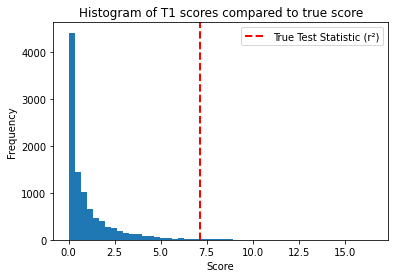

7.123297230470761


In [9]:
#change to 50 bins or 100 bins 
plt.hist(r_values,bins = 50)
plt.axvline(true_r, color='red', linestyle='dashed', linewidth=2, label=f'True Test Statistic (r²)')

# Add a title, x-axis label, and y-axis label
plt.title('Histogram of T1 scores compared to true score')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Add a legend
plt.legend()
plt.savefig('histogram.png', dpi=300)  # You can specify the desired DPI (dots per inch)

# Show the plot
# Show the plot
plt.show()
print(true_r)

In [11]:
num_more_extreme = sum(i >= true_r  for i in r_values)
p_value = num_more_extreme/data_size
p_value = num_more_extreme/(permutations-1)
print(p_value)

#the p-value is 0.007 which is significant  

0.0075


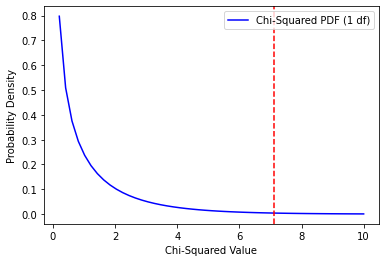

0.007608864352767197


In [12]:
#part c: chi squared distribution 
#make sure you integrate to infinity. 
#np.inf or can also do 1-cdf so this is ok. 
df = 1

x = np.linspace(0, 10) 

chi2_pdf = stats.chi2.pdf(x, df)
plt.plot(x, chi2_pdf, label='Chi-Squared PDF (1 df)', color='blue')
plt.axvline(true_r, color='red', linestyle='dashed')

# Add labels and a legend
plt.xlabel('Chi-Squared Value')
plt.ylabel('Probability Density')
plt.legend()

# Calculate the p-value using the chi-squared cumulative distribution function (CDF)
p_value = 1 - stats.chi2.cdf(true_r, df)

plt.savefig('chi2.png', dpi=300)  # You can specify the desired DPI (dots per inch)

# Show the plot
plt.show()
print(p_value)

#the p value is 0.0076 which is significant 

In [10]:
#part d

#control FWER at 0.05 

#step 1: compute test statistics for all the SNP's. 

test_statistics = []

#this could be generalized
for i in range(10):
    snp_data_temp = genotype_data[:,i]
    rtemp, ptemp = scipy.stats.pearsonr(snp_data_temp, phenotype_data)
    true_r_temp = data_size*rtemp**2
    test_statistics.append(true_r_temp)

p_values = []
for i in range(10):
    p_values.append(1 - stats.chi2.cdf(test_statistics[i], df))

print(p_values)


[0.007608864352767197, 0.5529325726684817, 0.080418593799788, 0.03076361349340162, 0.004045787087248787, 0.007608864352767197, 0.556905117144552, 0.00893560663839088, 0.005661036886680071, 0.0492481058001466]


In [11]:
#proposition: reject null hypothesis that snp i is not associated with phenotype if pi < t, need to pick t. 

corrected_alpha = 0.05/10
print(corrected_alpha)
#this will be the new cutoff. 

0.005


In [12]:
[p <= corrected_alpha for p in p_values]

#with the new corrected alpha cutoff, only the 5th SNP is significant 


[False, False, False, False, True, False, False, False, False, False]